# Week 3 - Football players and Neurolympic

This week we are going to bring it all together and look at a real data set on >1000 dutch football players who have played 4 cognitive games from Neurolympic. Neurolympic is developed by researchers at UvA, and part of [BrainsFirst](http://www.brainsfirst.com/), a company started by one of your teachers in this masters. BrainsFirst has developed the *NeurOlympics* (You can try the demo [here](https://neurolympics.nl/campaign/?c=43)) games to accurately measure an individual's cognitive abilities. The NeurOlympics Brain-based Assessment Games are based on state-of-the-art neuroscientific experiments and gauge how efficient different brain areas are operating. Using the outcomes of these brain-based cognitive games, we can accurately predict an individual's intelligence, how good stock traders are performing, and whether a child's cognition lacks behind or is ahead of its age-matched peers. We are also able to predict school performance (CITO test scores), whether athletes will make it into the top segment and get a professional contract (football, volleyball), and who is the best hire for IT consultancy firms and cybersecurity companies.

### What do the cognitive tests of BrainsFirst measure?
The cognitive tests of BrainsFirst were developed to measure as many different aspects of executive functions as possible. Executive functions enable people to coordinate and adjust their basic and complex information processing capabilities to be in line with internal goals and/or requirements imposed by the external world (Diamond 2013; Miller 2000; Ridderinkhof, Ullsperger, Crone, & Nieuwenhuis, 2004).

### The executive function cycle
To enable planned or goal-oriented behavior, multiple cognitive functions are required that operate in concert to ensure that our actions are efficient and occur in the right order. Below, the different cognitive functions that make up the executive function cycle are described. Importantly, all these cognitive functions depend on different brain regions. Therefore, large individual differences in the efficiency of these cognitive processes exist in the normal population.
#### 1. WORKING MEMORY (remember-game)
To initiate and supervise goal-oriented behavior, people need to keep specific goals, subgoals and the order in which these subgoals have to be executed in working memory. Individuals differ greatly in the amount of information they can maintain in working memory and this has serious consequences for daily life. People with larger working memory capacity are more intelligent, more successful at school, more creative and more proactive at work.
#### 2. ATTENTION (concentrate-game)
Then, the person needs to select and amplify the right perceptual input, thoughts and action. The efficiency of this attentional selection process depends on how well the person can keep his/her focus (concentration span), how fast attention can be directed towards important information, and how well attention can select relevant information.
#### 3. INHIBITION (control-game)
Besides the fact that selection of the relevant information is essential for goal-oriented behavior, inhibition of irrelevant perceptual input, thoughts, and inappropriate/wrong motoric actions is just as important. Again, large individual differences in inhibition exist in the human population.
#### 4. ACTION (all games)
Then, the person needs to act as fast as possible without losing accuracy. Some people are better at acting fast without a performance loss.
#### 5. EVALUATIVE CONTROL (control-game & concentrate-game)
Monitoring the efficiency of our own behavior is crucial to reach prospective goals. Some people can switch very rapidly from one mental concept to the other when something suddenly changes in the environment. Besides this, it is also important to monitor our own actions to ensure that our goals and subgoals are attained and that we don't make mistakes.
#### 6. REGULATIVE CONTROL (all games)
Finally, we need to adjust our goals, subgoals and order of subgoals whenever this is required. For example, when you start making mistakes as you are acting too fast or when the environmental settings have changed transiently or permanently. Then, the content of our working memory needs to be updated and the executive function cycle continues.


First, lets start by loading a few functions we will need for this tutorial:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # This is a well-known package for plotting
import warnings # just to remove annoying warnings that can pop up
warnings.filterwarnings("ignore")
# This is called a magic function and is specific for notebooks.
# This helps us plot inside our notebook (not actually necessary, but its nicer)
%matplotlib inline

#### Load our data set
Then we would like to load our dataset using pandas. Make sure you have downloaded the csv-file from blackboard, and that it is in the same folder as this notebook.

In [2]:
data_path = 'FootballData_anonymous.csv'
df = pd.read_csv(data_path)
# lets print all the columns to get a good overview of what we have here
print(df.columns.values)
# Also, lets print the shape
print('This dataset has {0} observations and {1} variables.'.format(df.shape[0], df.shape[1]))

['temp_ID' 'Positie' 'Been' 'Team' 'Datum.test' 'age'
 'international (0 = no, 1 = yes)'
 'decision (1 = not good enough, 2 = no decision yet, 3 = prof contract)'
 'WM1' 'WM2' 'WM3' 'WM4' 'WM5' 'WM6' 'WM7' 'WM8'
 'ANTICIPATION_totaltime_gameplayed' 'ANTICIPATION_timeuntilchallenge'
 'ANTICIPATION_timeinchallenge' 'ANTICIPATION_pointspersecond'
 'CONTROL_accuracy_repeat_2trials' 'CONTROL_accuracy_repeat_3trials'
 'CONTROL_accuracy_repeat_4trials' 'CONTROL_accuracy_repeat_5trials'
 'CONTROL_RT_repeat_2trials' 'CONTROL_RT_repeat_3trials'
 'CONTROL_RT_repeat_4trials' 'CONTROL_RT_repeat_5trials'
 'CONTROL_RT_repeat_correct_2trials' 'CONTROL_RT_repeat_correct_3trials'
 'CONTROL_RT_repeat_correct_4trials' 'CONTROL_RT_repeat_correct_5trials'
 'CONTROL_accuracy_noswitch' 'CONTROL_accuracy_motorswitch'
 'CONTROL_accuracy_categoryswitch' 'CONTROL_RTe_noswitch'
 'CONTROL_RTe_motorswitch' 'CONTROL_RTe_categoryswitch'
 'CONTROL_RTcorrect_noswitch' 'CONTROL_RTcorrect_motorswitch'
 'CONTROL_RTcorrect_

In [3]:
# Many columns have very long names, but one is unnecessarily long. Lets change that.
df = df.rename(index=str,
                 columns={'decision (1 = not good enough, 2 = no decision yet, 3 = prof contract)': 'Contract'})


### MatplotLib for plotting
**MatplotLib** is a very power plotting tool for python, made to make the transition easier for scientists who are used to work in MatLab. The more you work with python, the more you will notice how much you can actually accomplish with matplotlib, albeit a bit cumbersome. Here we will start off with some basic plotting, and then continue with a wrapper used around MatplotLib for more convenient plotting.

In MatplotLib we have a large unit of plotting functions. Some examples are:
- plt.plot() plots a normal X/Y plot, usually with a line connecting the points
- plt.bar() for bar plots
- plt.hist() for histograms
- plt.scatter() for doing scatter plots
- plt.loglog() similar to plot, but converts the values to log

Lets start with plotting the age and one of the measurements, lets see if it looks like there is some type of correlation.

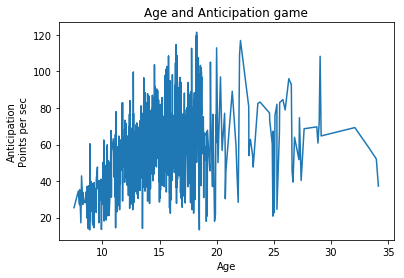

In [4]:
age = df['age'].values
ant_PPS = df['ANTICIPATION_pointspersecond'].values
# lets plot
# The first argument will be the x-values, and the second will be the y-values
plt.plot(age, ant_PPS)
# lets add a name for our x axis
plt.xlabel('Age')
# lets add a name for our y axis
plt.ylabel('Anticipation\nPoints per sec')
# This is how we add a title in matplotlib
plt.title('Age and Anticipation game')
plt.show()

However, this doesn't look too good. Using the simple plot function in matplotlib draws a line between each data point. Lets try with a scatter plot instead, and also, lets try to increase the size of the text a bit.

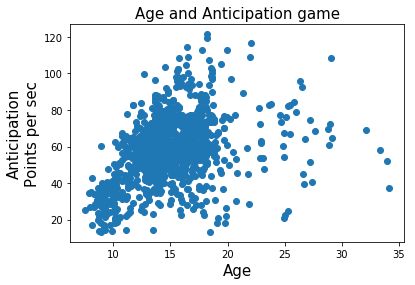

In [5]:
age = df['age'].values
ant_PPS = df['ANTICIPATION_pointspersecond'].values
# lets plot
# The first argument will be the x-values, and the second will be the y-values
plt.scatter(age, ant_PPS)
# lets add name for our x axis
plt.xlabel('Age', size=15)
# lets add name for our y axis
plt.ylabel('Anticipation\nPoints per sec', size=15)
# This is how we add a title in matplotlib
plt.title('Age and Anticipation game', size=15)
plt.show()

**Much better**! This looks pretty good already and we can see that there is some type of linear relationship. How about if we would like to color the dots according to whether or not they have gotten a contract? Now it gets a bit more complicated. 

We know that the contract column is coded by:
- 1 = Not good enough for a contract
- 2 = Unknown (not yet decided)
- 3 = Professional contract

Lets try to color our scatter plot accordingly:

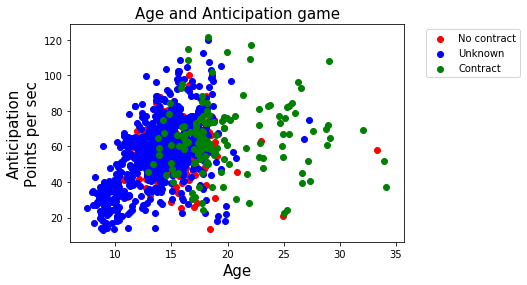

In [6]:
# We want to color by red (no contract), blue (unknown), and green (contract)
colors = ['r', 'b', 'g'] # the first letter is enough for python to understand
# Lets plot 3 times, each time we extract the corresponding data based on the contract code
for i in range(3):
    # lets extract participants with contract value i+1
    dftemp = df[df.Contract == i+1]
    # This is how we extract from the different columns
    # .values gives us the values in a numpy array
    age = dftemp['age'].values
    ant_PPS = dftemp['ANTICIPATION_pointspersecond'].values
    # lets plot
    # The first argument will be the x-values, and the second will be the y-values
    # lets also define the color using the list of color names we have above
    # we use the i-index to send each color in sequence as defined by our
    # variable colors above
    plt.scatter(age, ant_PPS, color=colors[i])


# this puts a box (or legend) in the plot to describe the colors
# by setting bbox_to_anchor to these values, we make sure it ends up outside the plot
plt.legend(['No contract', 'Unknown', 'Contract'], loc=2, bbox_to_anchor=(1.05, 1))
# lets add name for our x axis
plt.xlabel('Age', size=15)
# lets add name for our y axis
plt.ylabel('Anticipation\nPoints per sec', size=15)
# This is how we add a title in matplotlib
plt.title('Age and Anticipation game', size=15)
plt.show()

Now it starts to look like that there might be a difference between people with and without contracts!
<div class='alert alert-info'>
**ToThink**: You should know by now why we need to do i+1</div>

<div class="alert alert-warning">
**ToDo**: Copy paste the above code to the cell below, and change it so that we only plot *No contract* and *Contract*. Then try the same thing, but see if it looks like ATTENTION_RT_incongruent also might have a linear relationship with age.
</div>

In [7]:
# copy here

### Seaborn for plotting
Now as you can see, it quickly got a bit complicated just to add color to our dots. MatplotLib is an excellent tool, but the high control comes with the price of us having to define a lot of things. This is why several new packages have been developed, that uses MatplotLib in the background, but gives easy and quick functions for doing incredibly useful plotting. One such package is Seaborn. Lets say that we would like to do the same plot as above, but also add a regression line for each of the colors, indicateing the relationship between the variables. In this case we would have to make a regression between **age** and the **Anticipation score**, for each contract-category separately, and then plot 3 new lines. Luckily, its much easier in Seaborn:

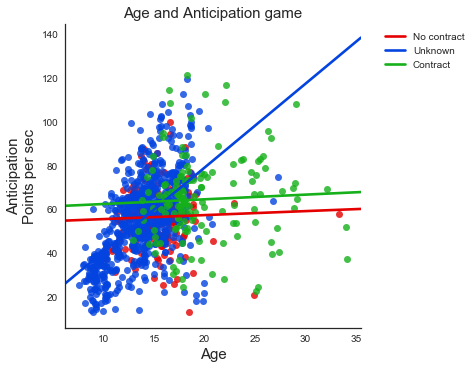

In [8]:
import seaborn as sns # this is how we import seaborn
sns.set(style="white") # seaborn has a lot of predefined plotting styles, google for more

# We need to predefine a few colors if we want similar ones as before
# seaborn has a xkcd-function where we can define colors by name (Many more options are available)
# and the function returns the hex code for the given color
colors = [sns.xkcd_rgb["red"], sns.xkcd_rgb["blue"], sns.xkcd_rgb["green"]]

"""
Now lets call the lmplot-function. Here we send in our data in the form of 
a panda dataframe, then we define the name of the columns we want on the x and y
axis. Setting Contract as hue makes sure seaborn knows how to color the plot. It will color
every new variable in the active column differently.
By sending an array with 3 colors (defined above) to palette, seaborn cycles
through the array and gives the color to each hue.

We then put ci to false, and remove our legend because we want to add our own legend later.
"""

sns.lmplot(x='age', y="ANTICIPATION_pointspersecond",
           hue='Contract', data=df, palette=colors, ci=False, legend=False)

plt.legend(['No contract', 'Unknown', 'Contract'], loc=2, bbox_to_anchor=(1.05, 1))
plt.xlabel('Age', size=15)
# lets add name for our y axis
plt.ylabel('Anticipation\nPoints per sec', size=15)
# This is how we add a title in matplotlib
plt.title('Age and Anticipation game', size=15)
plt.show()

As you can see, Seaborn functions can take in a lot of parameters and it preferably uses pandas dataframes (but this is not necessary). One of these parameters is **hue**, which is how the function knows how to color the plot. Here we basically accomplished the same thing as before, plus the regression line, by only calling one function. And as a result of this line, we can almost conclude through visual inspection that the linear relationship between **age** and **Anticipation score** is driven by subjects who we don't know yet if they will get a contract. 
<br/>
<div class='alert alert-info'>
**ToThink**: Can you come up with a good explanation to why this is the case?</div>
<br/>
On top of this we can also add the confidence intervals around the regression lines. The observant student should have noticed what in the code above needs to be changed to display the confidence intervals.
<br/>
<div class="alert alert-warning">
**ToDo**: Change the above code, so that we can see the confidence intervals. Also, the standard setting for the confidence interval is within 95%, however, we want this to be 80%.
<br/><br/>
**TIP**: To get a full overview of all of the parameters you can change for lmplot, either visit the [website](https://seaborn.pydata.org/generated/seaborn.lmplot.html) or type *sns.lmplot?* in an empty cell and run!
</div>

<div class='alert alert-warning'>
**ToDo**:
Seaborn comes with several ways of defining your colors. You can read a bit about them [here](http://seaborn.pydata.org/tutorial/color_palettes.html). Find where the colors variable is defined above and exchange it with the definition below:
</div>

In [9]:
colors = sns.color_palette("pastel", 3) # we want the palette called pastel, and only 3 colors

### Normality

As you might know, many powerful statistical tests assume normally distributed data. In python we can test this assumption, through several ways. Lets first try and plot the distributions using seaborns distplot:

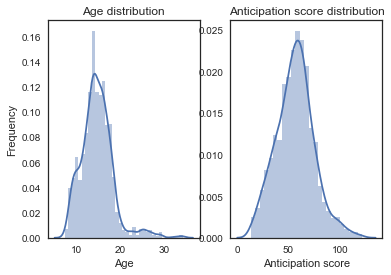

In [10]:
age = df['age']
ANT_pps = df['ANTICIPATION_pointspersecond']

# lets make 2 plots now, you haven't seen this before
# but you are now learning on the go ;) 

# we want 1 row, 2 columns and we unpack the axes (plots) immeditaly to their own variable (ax1 and ax2)
# f is our handle for the figure, needed if we want to save the whole figure into file
# (we can save the figure by: f.savefig('nameoffile.png'))
f, (ax1, ax2) = plt.subplots(1, 2)

# a simple dist plot takes an array of values and plots the distribution of values.
# since we now have two plots (ax1 and ax2) we need to define which one we should plot in
sns.distplot(age, ax=ax1)

# When we want to name the x, y and title on axes, we need to use the method set_****()
ax1.set_title('Age distribution')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Age')

sns.distplot(ANT_pps, ax=ax2)
ax2.set_title('Anticipation score distribution')
ax2.set_xlabel('Anticipation score')

plt.show()

The distributions look quite normal, but lets test this assumption:

In [11]:
# lets import normal test from the sublibrary stats in scipy
from scipy.stats import normaltest

# lets extract age and ANTICIPATION_pointspersecond
age = df['age'].values
ANT_pps = df['ANTICIPATION_pointspersecond'].values
# send each array to the normal test
k, p = normaltest(age)
k1, p1 = normaltest(ANT_pps)

print('Age k:', k, ' - Age p:', p)
print('Anticipation k:', k1, '- Anticipation p:', p1)

('Age k:', 270.19268550913154, ' - Age p:', 2.1301187558406405e-59)
('Anticipation k:', 15.827555642705416, '- Anticipation p:', 0.00036567052995703324)


*However*, how should we interpret these values? If you look up the **normaltest** function, you will see the following defintion:

*Tests whether a sample differs from a normal distribution.
This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s [R246], [R247] test that combines skew and kurtosis to produce an omnibus test of normality.*<br/><br/>

<div class='alert alert-info'>
**ToThink**: Do the siginifcant p-values mean that they are normally distributed or not?
</div>


**However**, one problem with normality tests is that they aren't very reliable. Given a large enough sample, a small deviation from perfect normality will give us a significant result (meaning that the distribution isn't normally distributed). Normality tests work better with smaller samples, but should however be avoided.

So what are we left with then? The most straight forward thing we can do is to plot the distribution and then plot a **Q-Q plot**. A Q–Q plot is used to compare the shapes of distributions, providing a graphical view of how properties such as location, scale, and skewness are similar or different in the two distributions. We can use this tool to compare our data against a normal distribution. (For an educational videon Q-Q plots, please see [here](https://www.youtube.com/watch?v=X9_ISJ0YpGw).

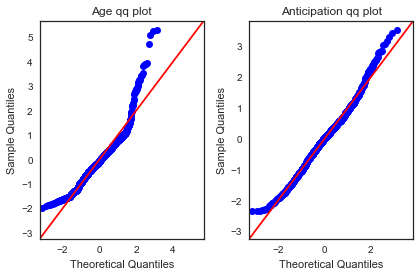

In [12]:
# statsmodels is similar to scipy, but have a few different functions
import statsmodels.api as sm

age = df['age']
ANT_pps = df['ANTICIPATION_pointspersecond']

f, (ax1, ax2) = plt.subplots(1, 2)

# When we don't define any distribution, it will be a normal distribution we plot our quantiles against

sm.graphics.qqplot(age, line='45', fit=True, ax=ax1)
ax1.set_title('Age qq plot')

sm.graphics.qqplot(ANT_pps, line='45', fit=True, ax=ax2)
ax2.set_title('Anticipation qq plot')

# tight_layout() helps us make the different subplots more proportional
# its just a nice trick to know, try to comment out to see what the difference is
plt.tight_layout()
plt.show()

So how do we interpret these plots? If the plotted blue dots perfectly follows the red line, we will say that the distribution is perfectly normal distributed. However, different distributions look different on a QQ-plot. Here are a few examples: <br/>

<img src='QQplots.png' style="float:left;width:400px;height:460px;">

Looking at our QQ-plot, it looks like we will have to conclude that the distributions indeed are normally distributed. Except maybe for the tails for age. This is because we have floor and ceiling effects on when people start and stop playing football. A neat trick to deal with effects like these, is to convert your values to a **logarithmic** scale:

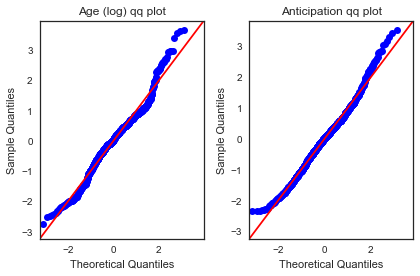

In [13]:
log_age = np.log(df['age'].values) # Turn age into log age
ANT_pps = df['ANTICIPATION_pointspersecond'].values

f, (ax1, ax2) = plt.subplots(1, 2)

# When we don't define any distribution, it will be a 
sm.graphics.qqplot(log_age, line='45', fit=True, ax=ax1)
ax1.set_title('Age (log) qq plot')

sm.graphics.qqplot(ANT_pps, line='45', fit=True, ax=ax2)
ax2.set_title('Anticipation qq plot')

plt.tight_layout()
plt.show()

### Test of group differences
Another useful thing we could do is to test group differences using a t-test. In Scipy we have two different t-tests:
- ttest_rel for dependent samples
- ttest_ind for independent samples

Lets say we would like to test No contract-players vs Contract players in terms of their reaction time during the Control game. Then we would need to use the independent ttest:

In [14]:
from scipy.stats import ttest_ind
noCon = df[df.Contract == 1]['ATTENTION_accuracy_congruent'].values
Con = df[df.Contract == 3]['ATTENTION_accuracy_congruent'].values

t, p = ttest_ind(noCon, Con)

print('T-test for No contract versus Contract players on reaction time')
print('Mean RT for No Contract players:', noCon.mean())
print('Mean RT for Contract players:', Con.mean())
print('t-stats:', t, ' - p-value:', p)

T-test for No contract versus Contract players on reaction time
('Mean RT for No Contract players:', 0.92876280124999999)
('Mean RT for Contract players:', 0.9609934108707483)
('t-stats:', -3.5100637928159863, ' - p-value:', 0.00050602719114189445)


Here, it looks like we have differences between the two groups, with a faster RT for football players with a contract. However, can we be sure that we are using the right test?<br/>

<div class='alert alert-warning'>
**ToDo**:
Plot and see if it is normally distributed data. Then, look at differences between Contract and No contract regarding ATTENTION_accuracy_congruent. Plot the two distributions and evaluate if they are normally distributed, and then apply the correct test.
</div>

In [15]:
# Do your assignment here

### Different ways of plotting
Below we will show you a few useful plots you might find interesting, make sure you read the comments and understand what it is happening:

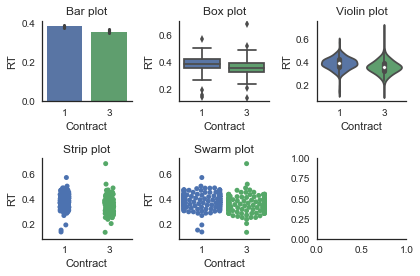

In [16]:
# Lets get the RT for contract and no contract players
dfplot = df[df.Contract != 2]

sns.set(style="white") # seaborn has a lot of predefined plotting styles, google for more
# Now we we want 2 rows and 3 columns of plots
f, axes = plt.subplots(2,3) 

# If you look up the shape of axes (axes.shape), you will notice that it is (2, 3)
# this means that if we would like to access the first axis, we first need to
# acces the first row, then the first column, such as: axes[0][0]
# meaning that the second axis on the first row is reachable by: axes[0][1]

# We will start with a simple bar plot
sns.barplot(x='Contract', y='CONTROL_RTe_noswitch', data=dfplot, ax=axes[0][0])
axes[0][0].set_title('Bar plot')
axes[0][0].set_ylabel('RT')

# now box plot
sns.boxplot(x='Contract', y='CONTROL_RTe_noswitch', data=dfplot, ax=axes[0][1])
axes[0][1].set_title('Box plot')
axes[0][1].set_ylabel('RT')

# now violin plot
sns.violinplot(x='Contract', y='CONTROL_RTe_noswitch', data=dfplot, ax=axes[0][2])
axes[0][2].set_title('Violin plot')
axes[0][2].set_ylabel('RT')

# now strip plot
# try plotting this one with jitter=False as well, try to notice the difference
sns.stripplot(x='Contract', y='CONTROL_RTe_noswitch', data=dfplot, ax=axes[1][0],jitter=True)
axes[1][0].set_title('Strip plot')
axes[1][0].set_ylabel('RT')

# now swarm plot
sns.swarmplot(x='Contract', y='CONTROL_RTe_noswitch', data=dfplot, ax=axes[1][1])
axes[1][1].set_title('Swarm plot')
axes[1][1].set_ylabel('RT')

# try out what happens without despine
sns.despine()
plt.tight_layout()
plt.show()

As you can see, we have many different options of plotting and it is important for you to know which one is most informative. A few of these plotting functions also have the hue-alternative for additional coloring from another column.


### Bonus plotting
Violin plots and boxplots are to be preferred over barplots, because they show off the distribution, which is totally hidden in bar plots. However, combining different types of plots can give you an even better and more intuitive way of looking at the data. Here we want to give you a taste of a slightly more advanced way of plotting, this is totally for your curiosity and not mandated at all :) Below we are plotting players who are between 15 and 20. We are interested in plotting the distribution differences between contract and no contract players in terms of their score on the **working memory** task.

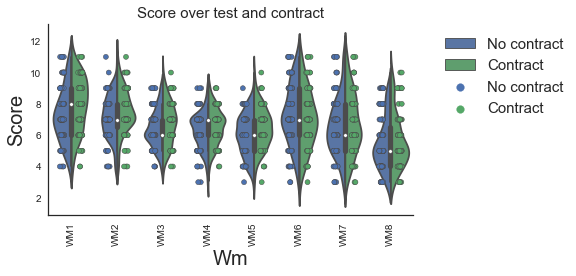

In [17]:
sns.set(style="white")

# this is how we can choose data based on several conditions
# for example, older than 15 AND younger than 20
df2 = df[(df.age > 15) & (df.age < 20)]

# lets only use data where we know which position they play
df2 = df2[df2.Positie != 'nan']

curr_test = 'WM'
col_names = df.columns.values
# Now we want to get a list of column names from our data that
# all start with WM, spend some time and try and see if you can
# understand what is happening below
labels = [name for name in col_names if name.startswith(curr_test)]

# These are the names for 1, 2, 3 codes in the Contract-column
label_names = ['No contract', 'Unknown', 'Contract']

# here we remove "unknowns"
df2 = df2[df2['Contract'] != 2]
# here we are renaming all the numbers in the Contract column
# to corresponding names in label_names
df2['Contract'] = [label_names[x-1] for x in df2['Contract'].values]

# by using the melt function, we can organize our WM scores in one column
# and then have one identifier column, saying which WM task (1-8) it was
df3 = pd.melt(
        df2, id_vars=['temp_ID', 'Contract'], 
        var_name=curr_test, value_vars=labels, value_name='score')

# This is how we do the violin plot, feel free to play around with the settings
# and see what happens
sns.violinplot(x=curr_test, y="score",
               hue='Contract',
               data=df3, split=True, gridsize=400, legend=False)


# here we are adding a strip plot on top
g = sns.stripplot(x=curr_test, y="score",
              hue='Contract', data=df3, split=True, linewidth=.5, jitter=True)

g.legend(loc=2, bbox_to_anchor=(1.05, 1), fontsize=15)

plt.xlabel(curr_test.capitalize(), size=20)

plt.ylabel('Score', size=20)

plt.title('Score over test and contract', size=15)

plt.xticks(range(len(labels)), labels, rotation='vertical')


sns.despine()
plt.tight_layout()
plt.show()

In [24]:
df2 = df[(df.age > 15) & (df.age < 20)]
df2 = df2[df2.Positie != 'nan']
curr_test = 'WM'
col_names = df.columns.values
labels = [name for name in col_names if name.startswith(curr_test)]
label_names = ['No contract', 'Unknown', 'Contract']
df2 = df2[df2['Contract'] != 2]
df2['Contract'] = [label_names[x-1] for x in df2['Contract'].values]
df2['Contract']
df3 = pd.melt(
        df2, id_vars=['temp_ID', 'Contract'], 
        var_name=curr_test, value_vars=labels, value_name='score')
df3

,temp_ID,Contract,WM,score
0,129,No contract,WM1,5
1,1030,No contract,WM1,9
2,53,Contract,WM1,9
3,856,No contract,WM1,7
4,898,Contract,WM1,6
5,1014,No contract,WM1,9
6,1029,No contract,WM1,9
7,865,No contract,WM1,7
8,10,Contract,WM1,6
9,405,No contract,WM1,7


<div class='alert alert-info'>
**ToThink**:
Given this plot, which one of the WM tasks would you consider to be most informative to use for predicting whether or not someone have a contract?
</div>